In [1]:
#basic libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
items = pd.read_csv('Bakery.csv')


In [4]:
items.head(10)


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend
6,4,Muffin,2016-10-30 10:08:41,Morning,Weekend
7,5,Coffee,2016-10-30 10:13:03,Morning,Weekend
8,5,Pastry,2016-10-30 10:13:03,Morning,Weekend
9,5,Bread,2016-10-30 10:13:03,Morning,Weekend


In [6]:
items.shape


(20507, 5)

In [7]:
items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
x = items['Items'] == 'NONE'
print(x.value_counts())

False    20507
Name: Items, dtype: int64


In [9]:
items['date_time'] = pd.to_datetime(items['DateTime'] )
items.head()

,TransactionNo,Items,DateTime,Daypart,DayType,date_time
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57


In [10]:
items['year_month'] = items['date_time'].map(lambda x: str(x.year) + '-' + str(x.month))
items['hour'] = items['date_time'].dt.hour
items['day_of_week'] = items['date_time'].dt.dayofweek
items['day'] = items['date_time'].dt.day_name()
items.sample(10)

,TransactionNo,Items,DateTime,Daypart,DayType,date_time,year_month,hour,day_of_week,day
15608,7460,Coffee,2017-03-03 09:47:59,Morning,Weekday,2017-03-03 09:47:59,2017-3,9,4,Friday
5043,2512,Bread,2016-03-12 11:16:59,Morning,Weekend,2016-03-12 11:16:59,2016-3,11,5,Saturday
895,450,Medialuna,2016-04-11 09:14:38,Morning,Weekday,2016-04-11 09:14:38,2016-4,9,0,Monday
14137,6841,Coffee,2017-02-19 11:04:14,Morning,Weekend,2017-02-19 11:04:14,2017-2,11,6,Sunday
14144,6842,Bread,2017-02-19 11:06:40,Morning,Weekend,2017-02-19 11:06:40,2017-2,11,6,Sunday
19415,9188,Coffee,2017-01-04 11:27:37,Morning,Weekend,2017-01-04 11:27:37,2017-1,11,2,Wednesday
13357,6524,Coffee,2017-02-13 14:21:59,Afternoon,Weekday,2017-02-13 14:21:59,2017-2,14,0,Monday
11362,5648,Sandwich,2017-01-30 14:22:27,Afternoon,Weekday,2017-01-30 14:22:27,2017-1,14,0,Monday
12227,6045,Hot chocolate,2017-05-02 11:58:01,Morning,Weekend,2017-05-02 11:58:01,2017-5,11,1,Tuesday
12089,5981,Valentine's card,2017-04-02 16:16:30,Afternoon,Weekend,2017-04-02 16:16:30,2017-4,16,6,Sunday


In [11]:
transcation_by_month = items[['year_month',
                              'TransactionNo']].groupby('year_month', as_index=False).sum()
transcation_by_month.head()

,year_month,TransactionNo
0,2016-1,230920
1,2016-10,663523
2,2016-11,4595265
3,2016-12,7727496
4,2016-2,303335


In [12]:
list_of_transactions = items[['TransactionNo', 'DateTime']].drop_duplicates()
list_of_transactions.head()

,TransactionNo,DateTime
0,1,2016-10-30 09:58:11
1,2,2016-10-30 10:05:34
3,3,2016-10-30 10:07:57
6,4,2016-10-30 10:08:41
7,5,2016-10-30 10:13:03


Text(0.5, 1.0, 'Number of transcations by month')

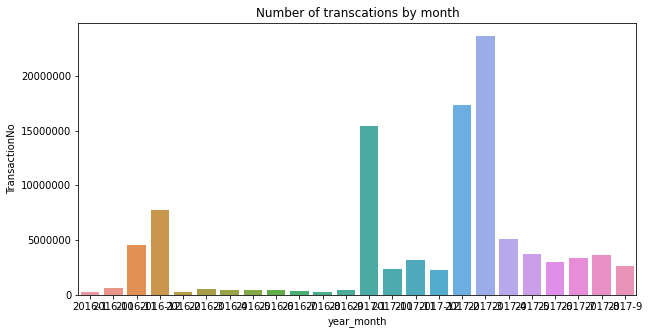

In [13]:
plt.figure(figsize = [10, 5])
sns.barplot(x ='year_month', y ='TransactionNo', data =transcation_by_month)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('Number of transcations by month')

In [14]:
items.drop_duplicates(keep='last', inplace=True)



In [15]:
items.shape

(18887, 10)

Text(0.5, 1.0, 'Number of transcations by day')

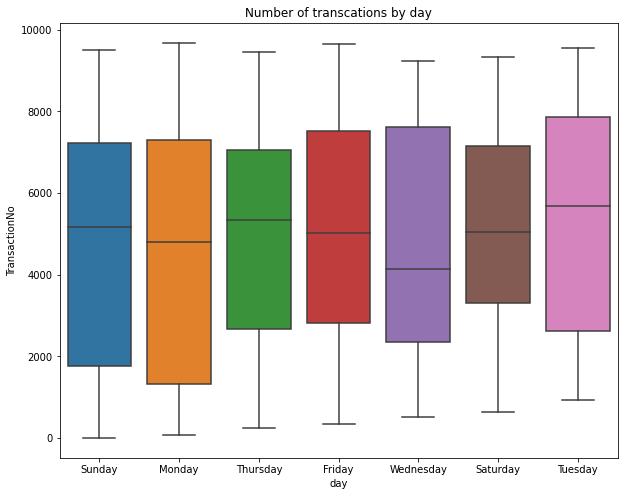

In [16]:
plt.figure(figsize = [10, 8])
sns.boxplot(x ='day', y ='TransactionNo', data = items)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('Number of transcations by day')

Text(0.5, 1.0, 'Weekend vs Weekday')

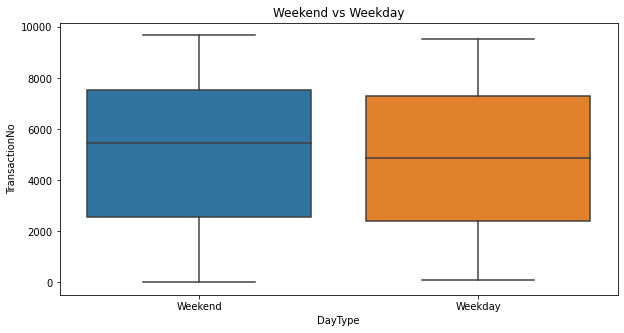

In [17]:
plt.figure(figsize = [10,5])
sns.boxplot(x ='DayType', y='TransactionNo', data= items)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Weekend vs Weekday")

Text(0.5, 1.0, 'Sales by Hour')

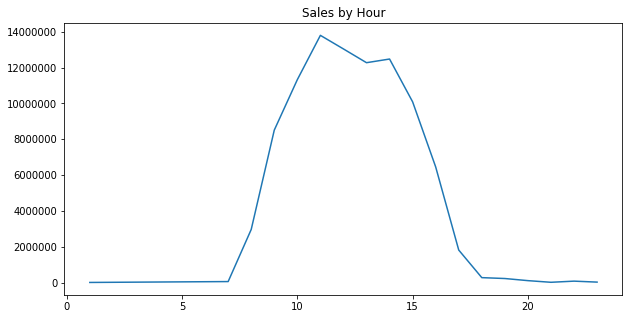

In [18]:
plt.figure(figsize=[10,5])
plt.plot(items[['hour','TransactionNo']].groupby('hour').sum())
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales by Hour')

Text(0.5, 1.0, 'Top 10 Items Sold')

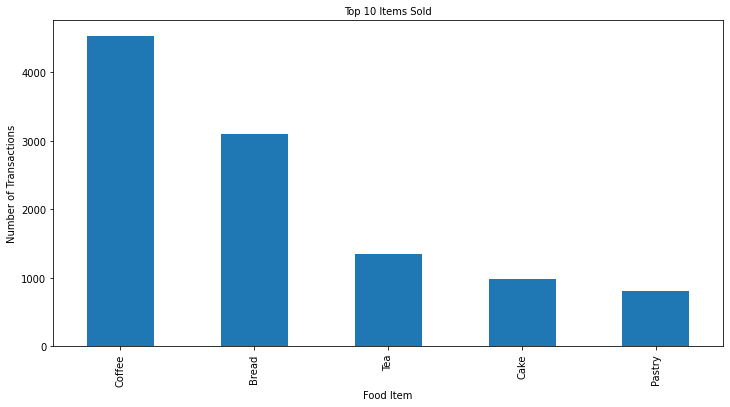

In [19]:
fig, ax = plt.subplots(figsize = (12,6))
items['Items'].value_counts().sort_values(ascending = False).head(5).plot.bar()

plt.xlabel('Food Item', fontsize =10)
plt.ylabel('Number of Transactions', fontsize =10)

ax.tick_params(labelsize = 10)
plt.title('Top 5 Items Sold', fontsize = 10)

In [20]:
def extract_season(df_orig):
    df = df_orig.copy()
    
    date = items['DateTime']
    
    items['date'] = pd.to_datetime(df['DateTime'])
    month = items['date'].dt.month
    day = items['date'].dt.day
    
    time_of_year = ['Winter', 'Spring', 'Summer', 'Fall']
    
    df.loc[(month < 3), 'Season']= time_of_year[0]
    df.loc[(month >=11)&(month >=11),'Season']= time_of_year[0]
    df.loc[(month>=3)&(month <6),'Season'] = time_of_year[1]
    df.loc[(month>=6)&(month <9),'Season'] = time_of_year[2]
    df.loc[(month>=9)&(month <11),'Season'] = time_of_year[3]
    
    return df

extract_season(items).head()

,TransactionNo,Items,DateTime,Daypart,DayType,date_time,year_month,hour,day_of_week,day,Season
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30 09:58:11,2016-10,9,6,Sunday,Fall
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:05:34,2016-10,10,6,Sunday,Fall
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10,10,6,Sunday,Fall
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10,10,6,Sunday,Fall
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10,10,6,Sunday,Fall


In [21]:
df= extract_season(items)

Text(0.5, 1.0, 'Sales by Season')

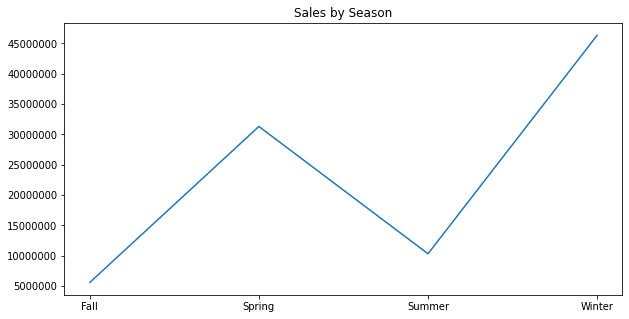

In [22]:
plt.figure(figsize=[10,5])
plt.plot(df[['Season','TransactionNo']].groupby('Season').sum())
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales by Season')

In [23]:
items['TransactionNo'].count()


18887

In [24]:
number_of_items = items['Items'].nunique()
number_of_items

94

In [25]:
items.count()


TransactionNo    18887
Items            18887
DateTime         18887
Daypart          18887
DayType          18887
date_time        18887
year_month       18887
hour             18887
day_of_week      18887
day              18887
date             18887
dtype: int64

In [26]:
transaction_count = items.groupby(by='Items')[['TransactionNo']].count().sort_values(by='TransactionNo', ascending=False)
transaction_count.head()

,TransactionNo
Items,
Coffee,4528
Bread,3097
Tea,1350
Cake,983
Pastry,815


In [27]:
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,TransactionNo
Items,
Coffee,23.974162
Bread,16.397522
Tea,7.147774
Cake,5.204638
Pastry,4.315137


In [28]:
transcation_by_month = items[['year_month',
                              'TransactionNo']].groupby('year_month', as_index=False).sum()
transcation_by_month.head(10)

,year_month,TransactionNo
0,2016-1,221247
1,2016-10,634189
2,2016-11,4324977
3,2016-12,7040519
4,2016-2,291583
5,2016-3,523297
6,2016-4,357475
7,2016-5,429128
8,2016-6,417158
9,2016-7,315789


Text(0.5, 1.0, 'Number of transcations by month')

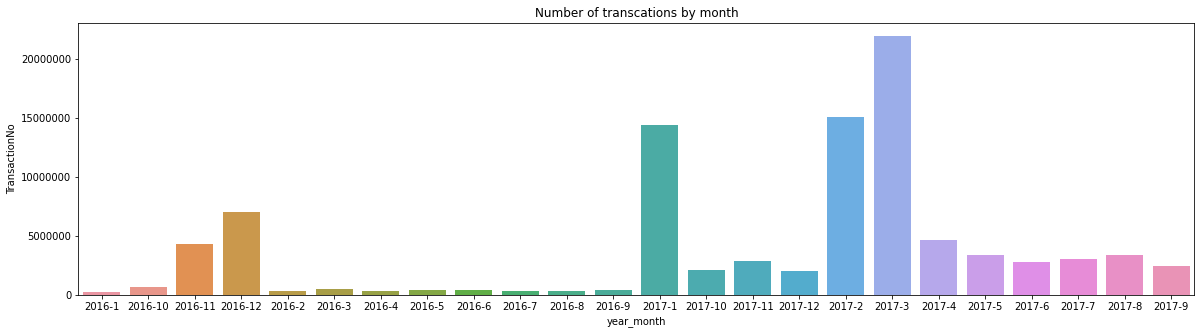

In [29]:
plt.figure(figsize = [20, 5])
sns.barplot(x ='year_month', y ='TransactionNo', data =transcation_by_month)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('Number of transcations by month')

In [30]:
items.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'date_time',
       'year_month', 'hour', 'day_of_week', 'day', 'date'],
      dtype='object')

In [32]:
items_per_transcation = items.groupby('TransactionNo').agg(','.join).reset_index()
items_per_transcation.head(5)

C:\Users\ali\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
C:\Users\ali\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
C:\Users\ali\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating f

,TransactionNo,Items,DateTime,Daypart,DayType,year_month,day
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10,Sunday
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10,Sunday
2,3,"Hot chocolate,Jam,Cookies","2016-10-30 10:07:57,2016-10-30 10:07:57,2016-1...","Morning,Morning,Morning","Weekend,Weekend,Weekend","2016-10,2016-10,2016-10","Sunday,Sunday,Sunday"
3,4,Muffin,2016-10-30 10:08:41,Morning,Weekend,2016-10,Sunday
4,5,"Coffee,Pastry,Bread","2016-10-30 10:13:03,2016-10-30 10:13:03,2016-1...","Morning,Morning,Morning","Weekend,Weekend,Weekend","2016-10,2016-10,2016-10","Sunday,Sunday,Sunday"


In [33]:
items.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'date_time',
       'year_month', 'hour', 'day_of_week', 'day', 'date'],
      dtype='object')

In [34]:
items_per_transcation = items_per_transcation.drop(['DateTime', 'year_month','Daypart','DayType'], axis=1)


In [35]:
items_per_transcation = items_per_transcation.drop(['day'], axis=1)
items_per_transcation.head(5)

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"


In [36]:
items_per_transcation.Items


0                                              Bread
1                                       Scandinavian
2                          Hot chocolate,Jam,Cookies
3                                             Muffin
4                                Coffee,Pastry,Bread
                            ...                     
9460                                           Bread
9461    Truffles,Tea,Spanish Brunch,Christmas common
9462                  Muffin,Tacos/Fajita,Coffee,Tea
9463                                   Coffee,Pastry
9464                                       Smoothies
Name: Items, Length: 9465, dtype: object

In [37]:
items_list = [item.split(',') for item in items_per_transcation['Items']]
items_list

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 'Coffee', 'Muffin'],
 ['Scandinavia

In [38]:
items

,TransactionNo,Items,DateTime,Daypart,DayType,date_time,year_month,hour,day_of_week,day,date
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30 09:58:11,2016-10,9,6,Sunday,2016-10-30 09:58:11
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:05:34,2016-10,10,6,Sunday,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10,10,6,Sunday,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10,10,6,Sunday,2016-10-30 10:07:57
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10,10,6,Sunday,2016-10-30 10:07:57
...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04 14:32:58,2017-9,14,0,Monday,2017-09-04 14:32:58
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04 14:32:58,2017-9,14,0,Monday,2017-09-04 14:32:58
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04 14:57:06,2017-9,14,0,Monday,2017-09-04 14:57:06
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04 14:57:06,2017-9,14,0,Monday,2017-09-04 14:57:06


In [39]:
items_per_transcation.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"


In [40]:
store_data_df = items.drop(['day','date_time','hour','day_of_week','DateTime', 'year_month','Daypart','DayType'], axis=1)


In [41]:
store_data_df.head()

,TransactionNo,Items,date
0,1,Bread,2016-10-30 09:58:11
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57
5,3,Cookies,2016-10-30 10:07:57


In [163]:
#transfer dataframe to list of lists
#transactions = []
#for i in range(0, store_data_df.shape[0]):
 #   temp = []
  #  for j in range(0, store_data_df.shape[1]):
   #     if not store_data_df.loc[i,j] is np.nan:
    #        temp.append(store_data_df.loc[i,j])
    #transactions.append(temp)

In [42]:
items_per_transcation

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
...,...,...
9460,9680,Bread
9461,9681,"Truffles,Tea,Spanish Brunch,Christmas common"
9462,9682,"Muffin,Tacos/Fajita,Coffee,Tea"
9463,9683,"Coffee,Pastry"


In [43]:
#convert items into list form
items_list = [item.split(',') for item in items_per_transcation['Items']]
items_list

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 'Coffee', 'Muffin'],
 ['Scandinavia

In [44]:
items.shape

(18887, 11)

In [45]:
from apyori import apriori
rules = apriori(transactions= items_list, min_support=0.0018, min_confidence=0.01, min_lift=3)
association_results = list(rules)
print("total Rules after run the Algorithm:",len(association_results))

total Rules after run the Algorithm: 12


# Explain Output:
# we're going to print our association results list to be clear to us:

In [46]:
for i in range(len(association_results)):
    print(association_results[i])

RelationRecord(items=frozenset({'Coke', 'Sandwich'}), support=0.005176967776016905, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coke'}), items_add=frozenset({'Sandwich'}), confidence=0.266304347826087, lift=3.706721547314578), OrderedStatistic(items_base=frozenset({'Sandwich'}), items_add=frozenset({'Coke'}), confidence=0.07205882352941176, lift=3.7067215473145776)])
RelationRecord(items=frozenset({'Jam', 'Fudge'}), support=0.0025356576862123614, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Fudge'}), items_add=frozenset({'Jam'}), confidence=0.16901408450704225, lift=11.265621900416583), OrderedStatistic(items_base=frozenset({'Jam'}), items_add=frozenset({'Fudge'}), confidence=0.16901408450704225, lift=11.265621900416583)])
RelationRecord(items=frozenset({'Juice', 'Jammie Dodgers'}), support=0.0021130480718436345, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jammie Dodgers'}), items_add=frozenset({'Juice'}), confidence=0.16, lift=4.149041095